In [1]:
# hide
# インポート
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### 2.2.1 kNN:  k-最近傍法 (Nearest Neighbor)
- 最も「単純」な学習アルゴリズム
    - 訓練データを記憶するだけ
- 記憶した訓練データ中の最も近いいくつかの点(近傍点)によってクラスを予測する
    - 予測に用いる近傍点の数(k)で性質が変わる

'KNN: kの数と、近傍点'

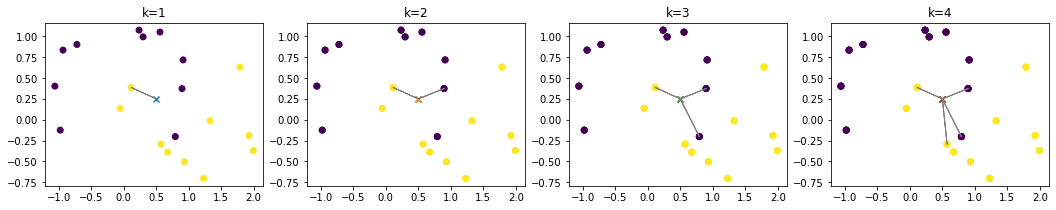

In [2]:
# hide
# kNN の動作
X, y = make_moons(n_samples=20, noise=0.2, random_state=1)
p = np.array([0.5, 0.25])
idxs = np.argsort(pairwise_distances([p], X)[0])
_fig, axes = plt.subplots(1, 4, figsize=(18, 3))
for pl in range(4):
    for i in range(pl+1):
        axes[pl].set_title('k={}'.format(pl+1))
        axes[pl].scatter(X[:,0], X[:,1], c=y)
        axes[pl].arrow(p[0], p[1], X[idxs[i]][0] - p[0], X[idxs[i]][1] - p[1], color="grey")
        axes[pl].scatter(p[0], p[1], marker='x')
'KNN: kの数と、近傍点'

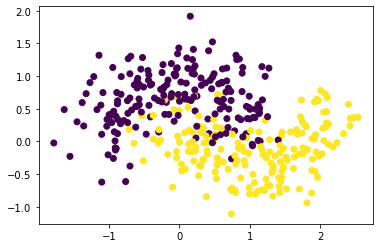

In [3]:
# データの生成と表示
X, y = make_moons(n_samples=500, noise=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [4]:
# モデルの作成と訓錬、予測
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
p_test = model.predict(X_test)
acc = (p_test == y_test).mean()
print("精度:{}".format(acc))

精度:0.92


#### kの値と境界の性質
- kが小さいと例外的なデータに影響を受けやすくなる
- kが大きくなると個々のデータ点の影響が減るので境界線はなめらかになり、汎化されやすくなる
- kが大きすぎると境界線がなめらかになりすぎて精度が下がる

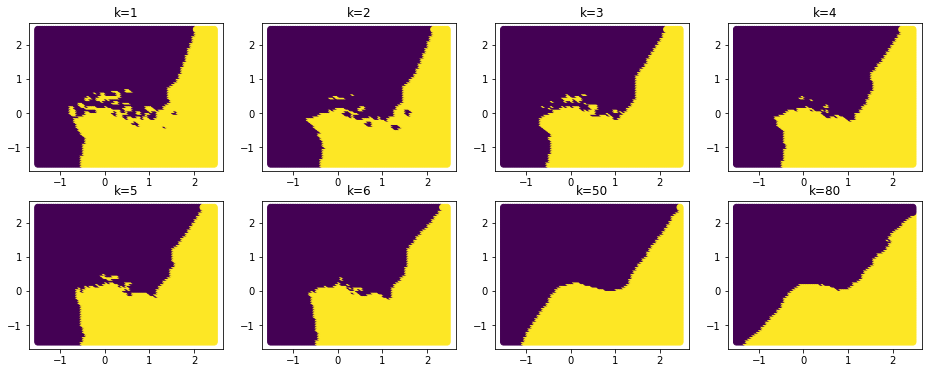

In [5]:
# hide
# さまざまな k による境界領域の変化
def plt_predict(model, axe, label):
    grid = np.meshgrid(np.arange(-1.5,2.5,0.05), np.arange(-1.5,2.5,0.05), indexing='xy')
    g = [[x, y] for x, y in zip(np.hstack(grid[0]), np.hstack(grid[1]))]
    p_g = model.predict(g)
    axe.scatter(grid[0], grid[1], c = p_g)
    axe.set_title(label)

_fig, axes = plt.subplots(2, 4, figsize=(16, 6))
for i, k in enumerate(list(range(1,7)) + [50, 80]):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    plt_predict(model, axes[i//4][i%4], "k={}".format(k))

'k と 精度の関係'

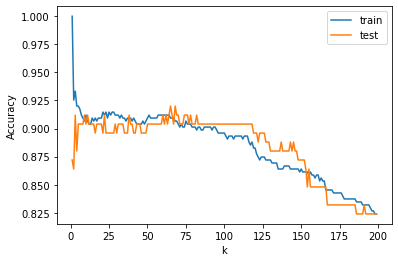

In [6]:
# hide
# 精度
train_acc = []
test_acc = []
r = range(1, 200, 1)
for k in r:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    p_train = model.predict(X_train)
    p_test = model.predict(X_test)
    train_acc.append((y_train == p_train).mean())
    test_acc.append((y_test == p_test).mean())
plt.plot(r, train_acc, label="train") 
plt.plot(r, test_acc, label="test") 
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
'k と 精度の関係'

- この場合は最良値が25の近辺にある
- ただしこの数はデータセットによって大きく変動する
